In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
df=pd.read_csv('/content/MarketFarePredictionData.csv')

In [4]:
df

MktCoupons  OriginCityMarketID  ...  Carrier_freq  ODPairID_freq
0               2                 178  ...      0.116826       0.000132
1               2                 178  ...      0.307651       0.000132
2               2                 178  ...      0.116826       0.000132
3               2                 178  ...      0.116826       0.000132
4               2                 178  ...      0.307651       0.000132
...           ...                 ...  ...           ...            ...
43066           1                  64  ...      0.153893       0.002640
43067           1                  64  ...      0.307651       0.002640
43068           1                  64  ...      0.153893       0.002640
43069           1                  64  ...      0.153893       0.002640
43070           1                  64  ...           NaN            NaN

[43071 rows x 26 columns]

In [7]:
df.isnull().sum()

MktCoupons                 0
OriginCityMarketID         0
DestCityMarketID           0
OriginAirportID            0
DestAirportID              0
Carrier                    0
NonStopMiles               0
RoundTrip                  0
ODPairID                   0
Pax                        0
CarrierPax                 0
Average_Fare               0
Market_share               0
Market_HHI                 1
LCC_Comp                   1
Multi_Airport              1
Circuity                   1
Slot                       1
Non_Stop                   1
MktMilesFlown              1
OriginCityMarketID_freq    1
DestCityMarketID_freq      1
OriginAirportID_freq       1
DestAirportID_freq         1
Carrier_freq               1
ODPairID_freq              1
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.columns

Index(['MktCoupons', 'OriginCityMarketID', 'DestCityMarketID',
       'OriginAirportID', 'DestAirportID', 'Carrier', 'NonStopMiles',
       'RoundTrip', 'ODPairID', 'Pax', 'CarrierPax', 'Average_Fare',
       'Market_share', 'Market_HHI', 'LCC_Comp', 'Multi_Airport', 'Circuity',
       'Slot', 'Non_Stop', 'MktMilesFlown', 'OriginCityMarketID_freq',
       'DestCityMarketID_freq', 'OriginAirportID_freq', 'DestAirportID_freq',
       'Carrier_freq', 'ODPairID_freq'],
      dtype='object')

In [10]:
numerical_cols=['MktCoupons', 'OriginCityMarketID', 'DestCityMarketID',
       'OriginAirportID', 'DestAirportID', 'Carrier', 'NonStopMiles',
       'RoundTrip', 'ODPairID', 'Pax', 'CarrierPax', 'Average_Fare',
       'Market_share', 'Market_HHI', 'LCC_Comp', 'Multi_Airport', 'Circuity',
       'Slot', 'Non_Stop', 'MktMilesFlown', 'OriginCityMarketID_freq',
       'DestCityMarketID_freq', 'OriginAirportID_freq', 'DestAirportID_freq',
       'Carrier_freq', 'ODPairID_freq']

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


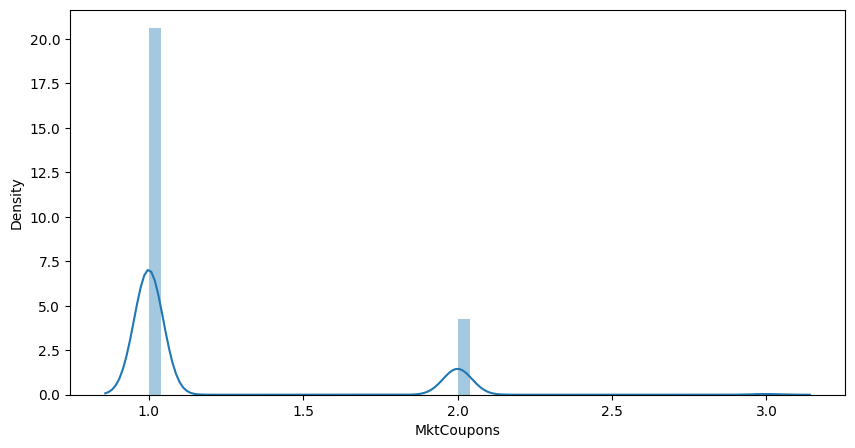

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


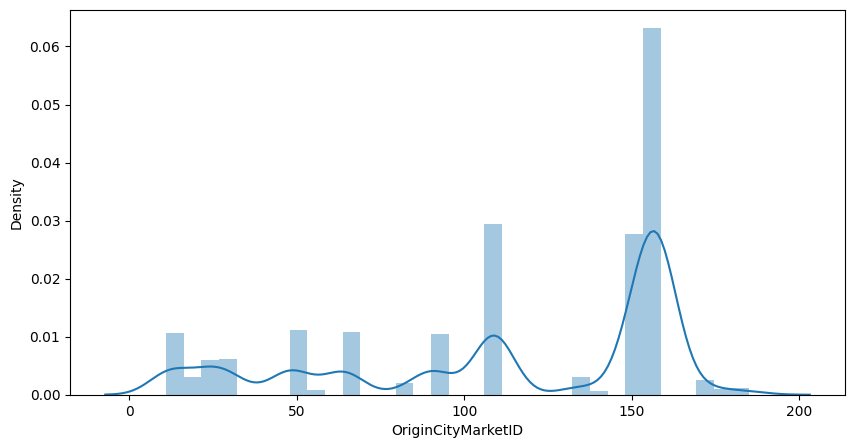

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


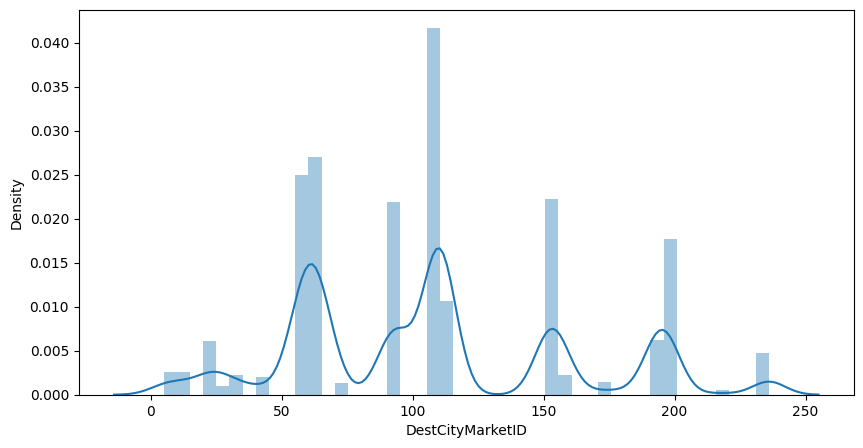

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


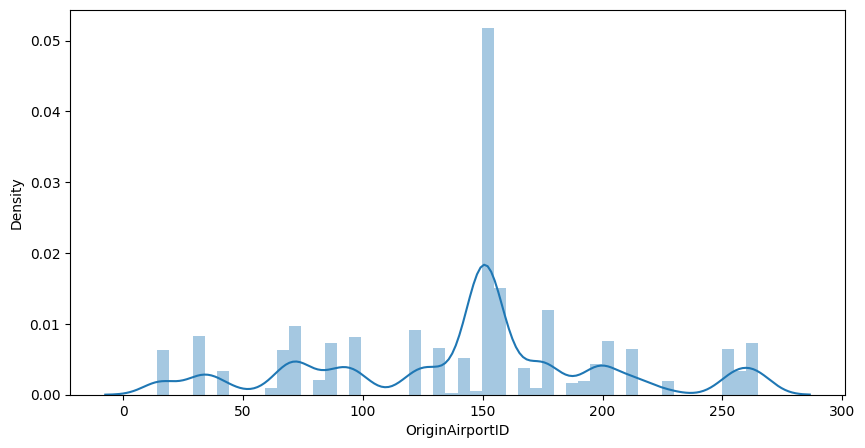

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


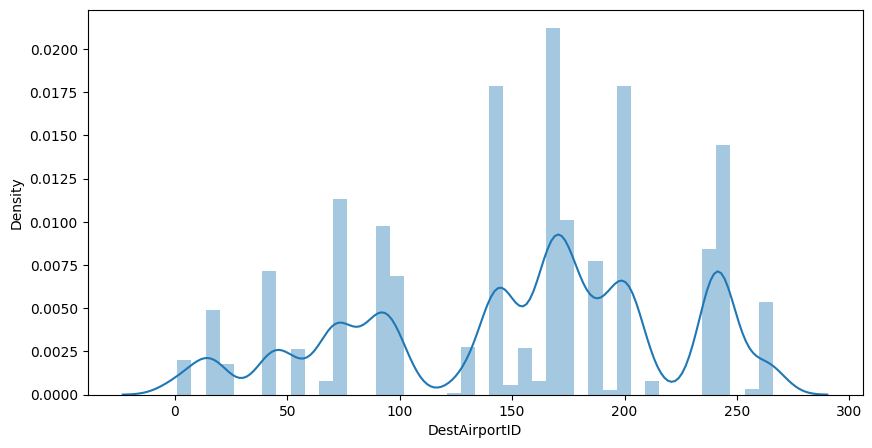

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


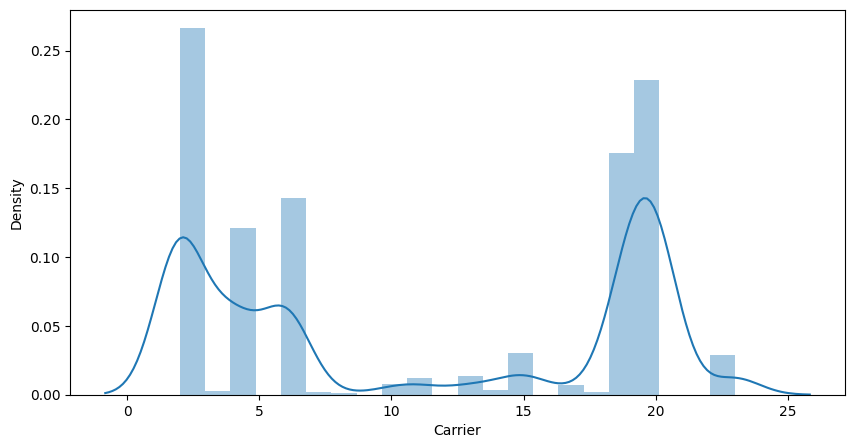

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


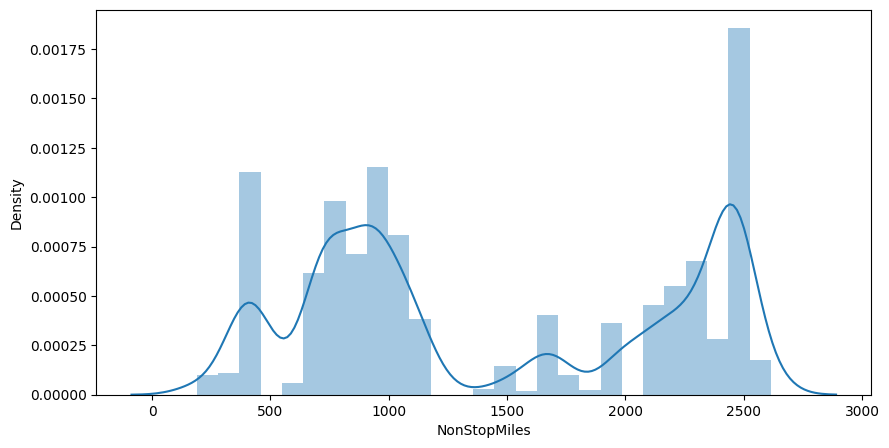

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


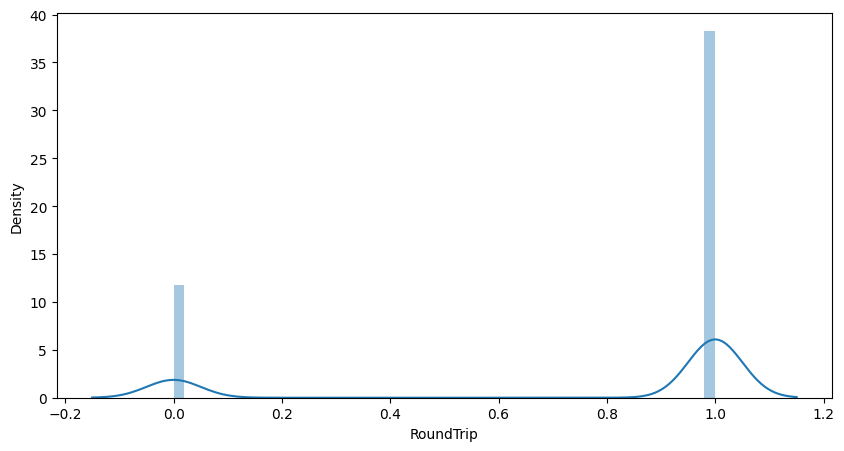

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


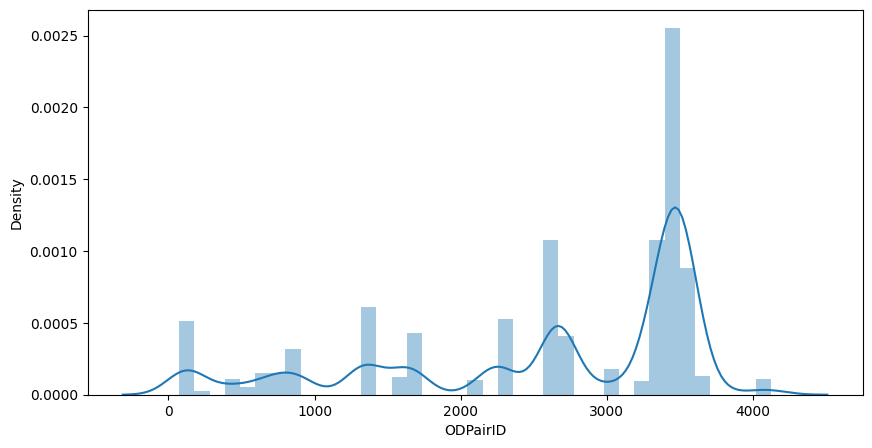

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


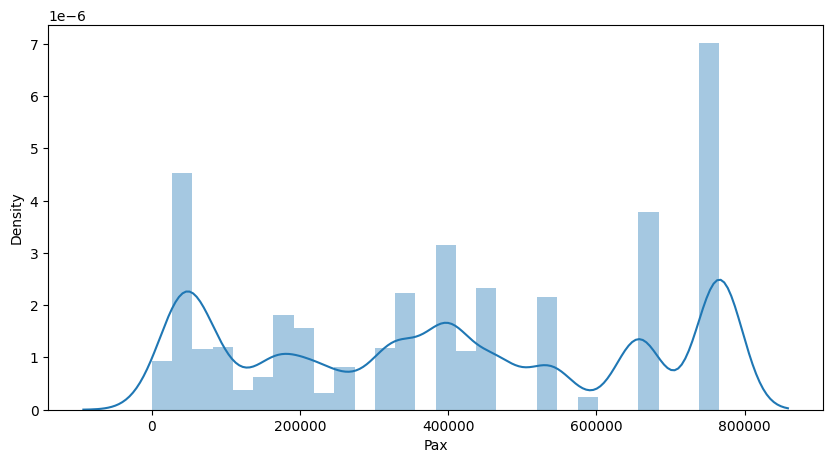

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


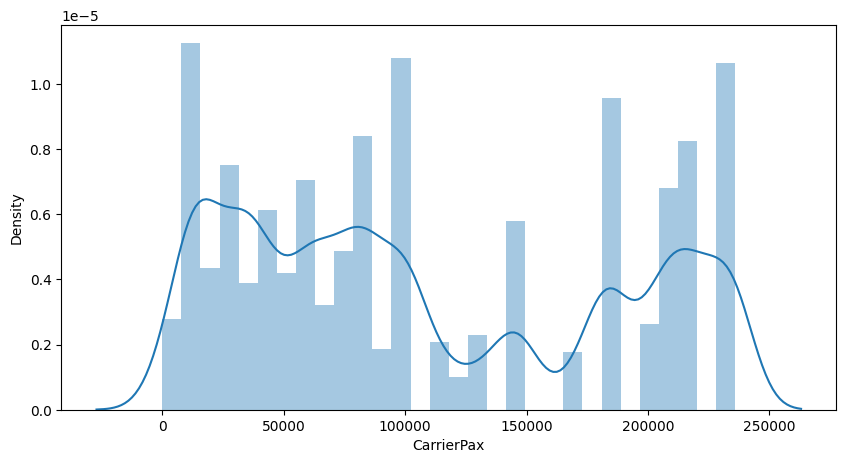

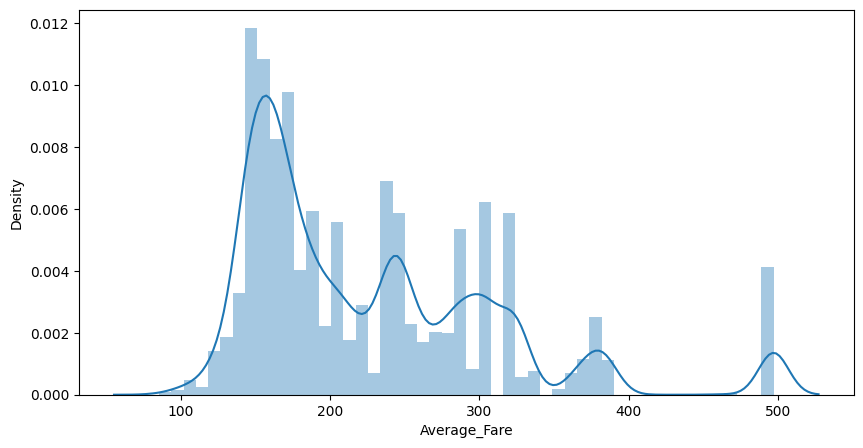

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


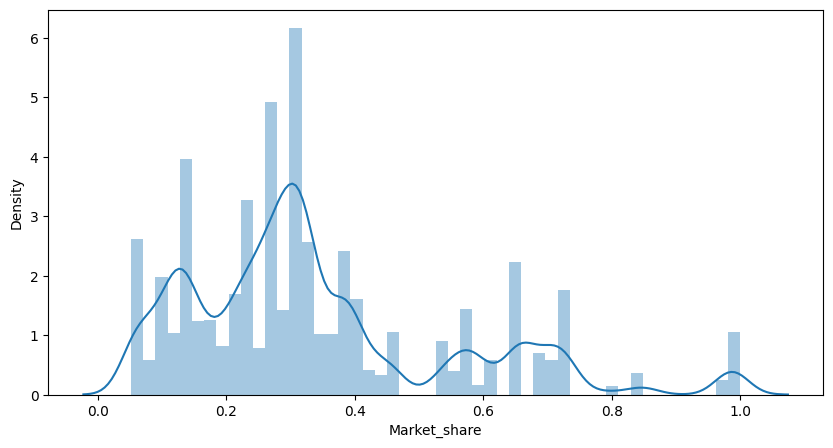

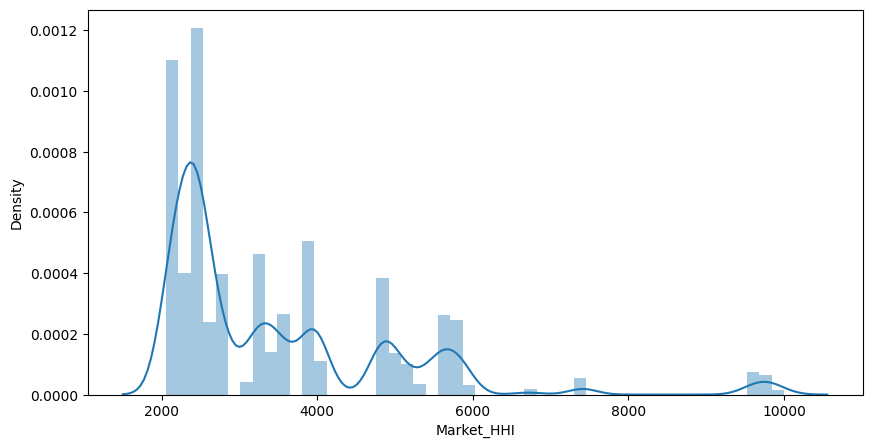

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


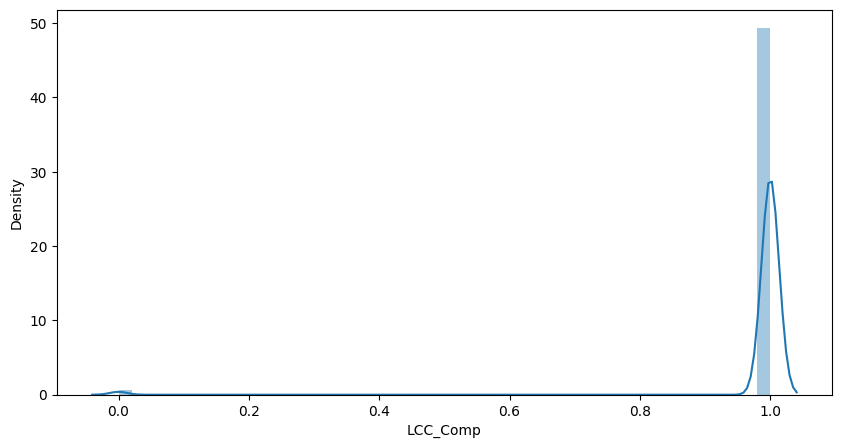

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


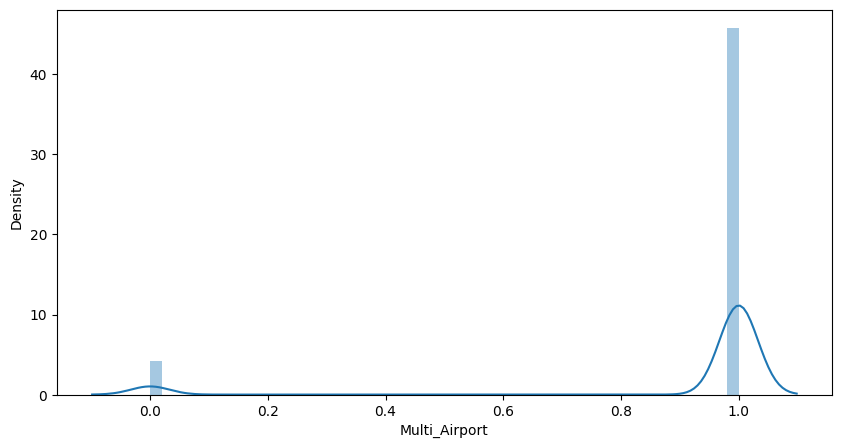

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


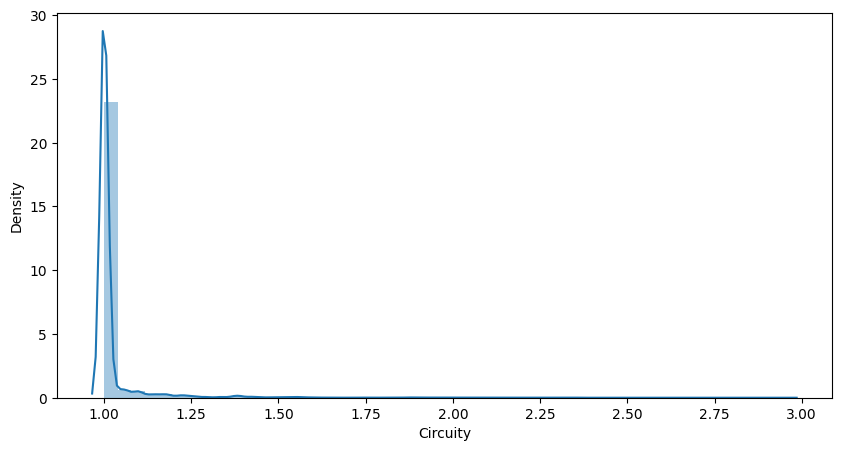

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


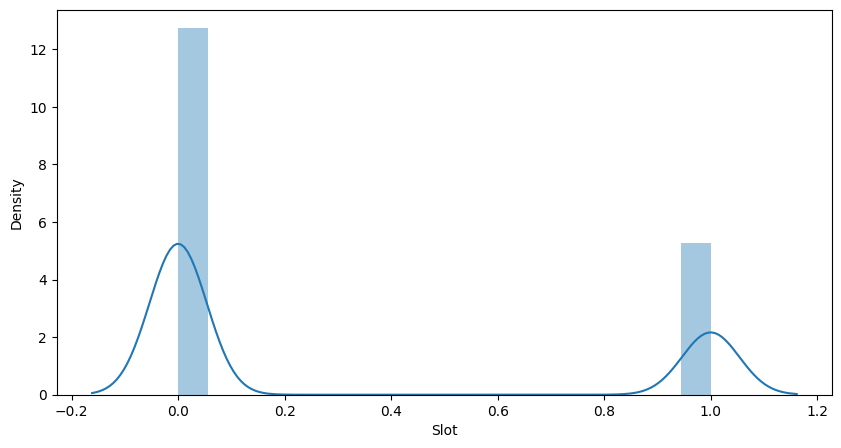

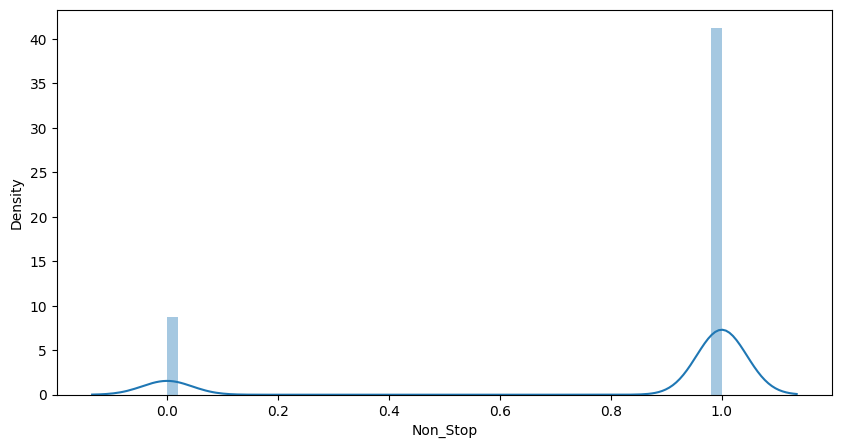

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


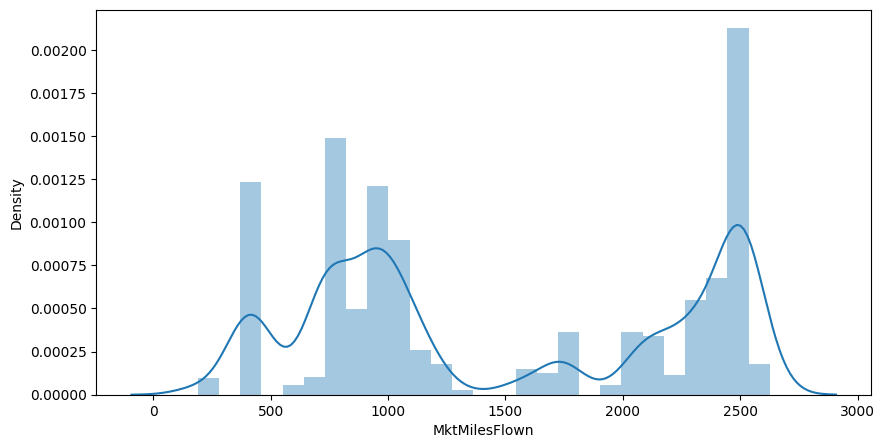

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


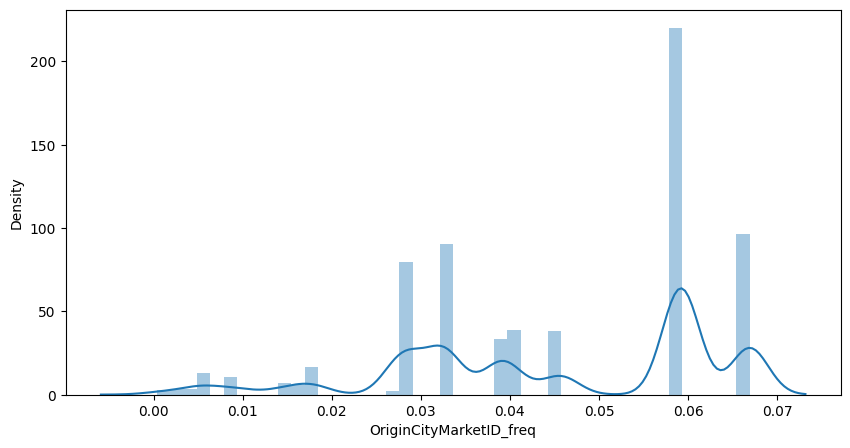

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


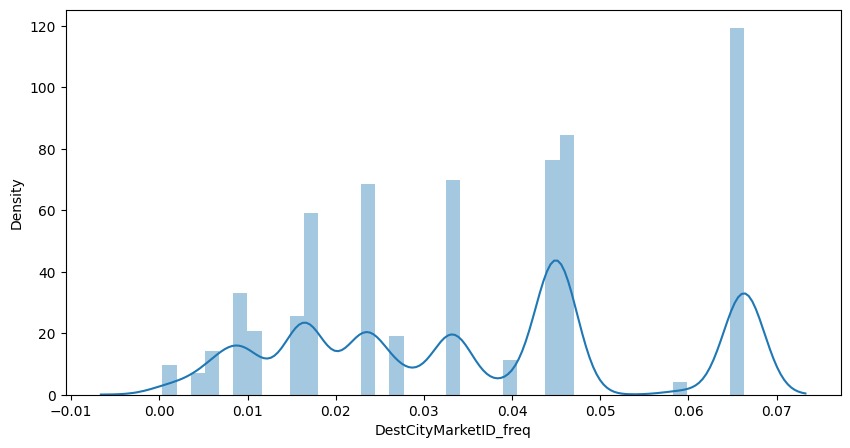

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


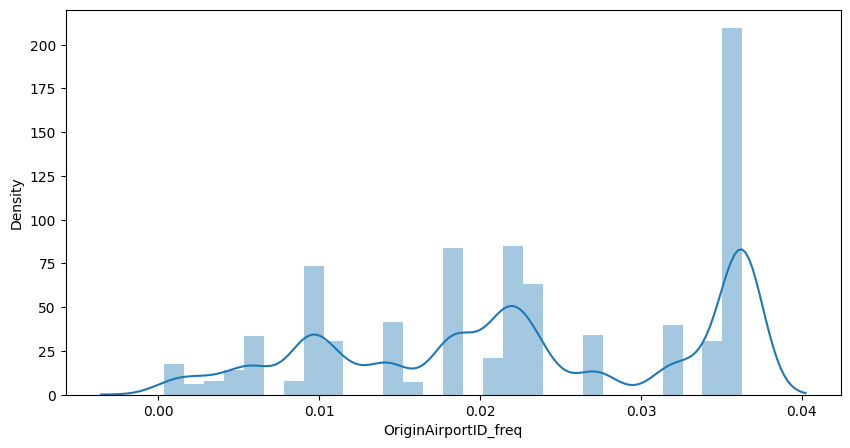

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


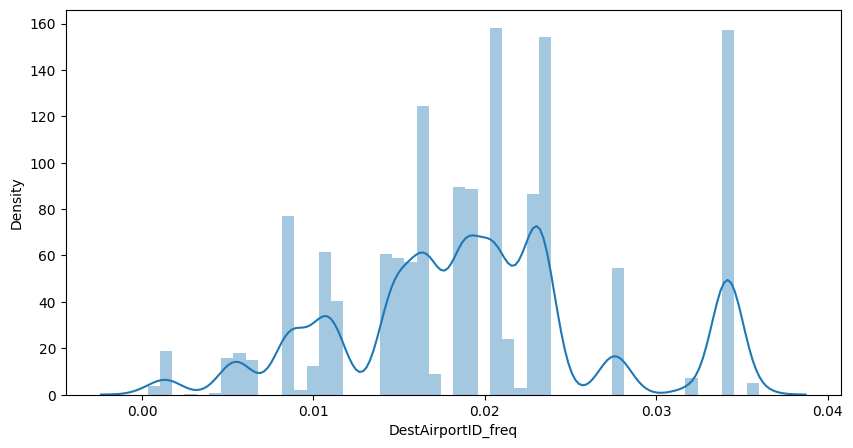

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


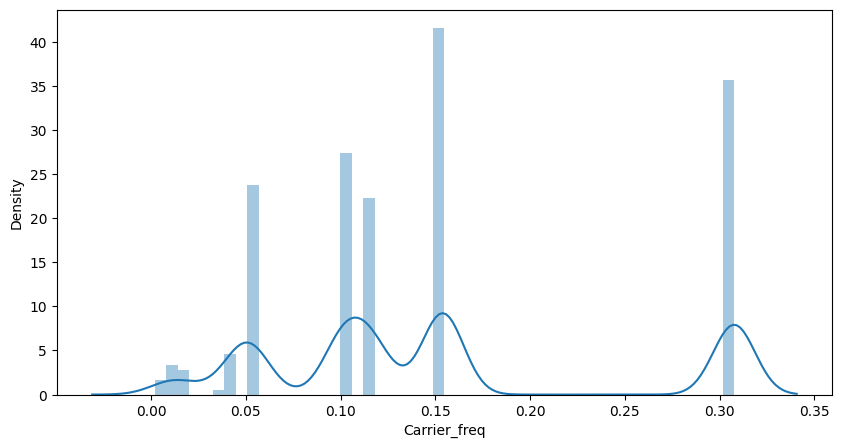

/tmp/ipython-input-11-712849512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols])


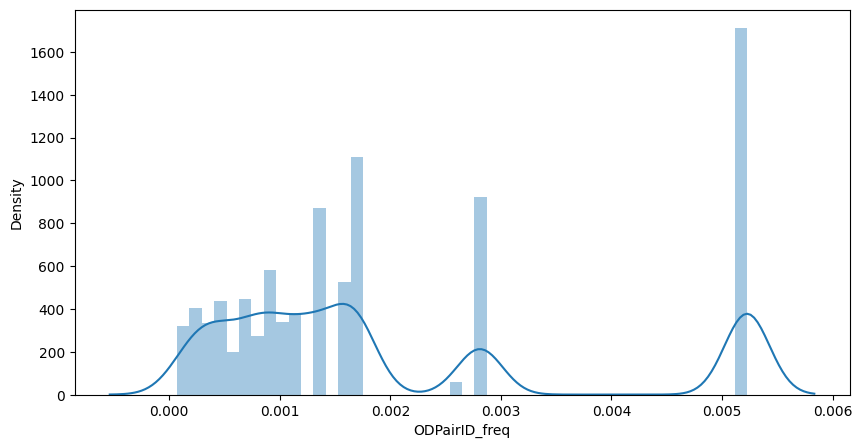

In [11]:
for cols in numerical_cols:
  plt.figure(figsize=(10,5))
  sns.distplot(df[cols])
  #df[cols].hist(bins=10)
  plt.show()

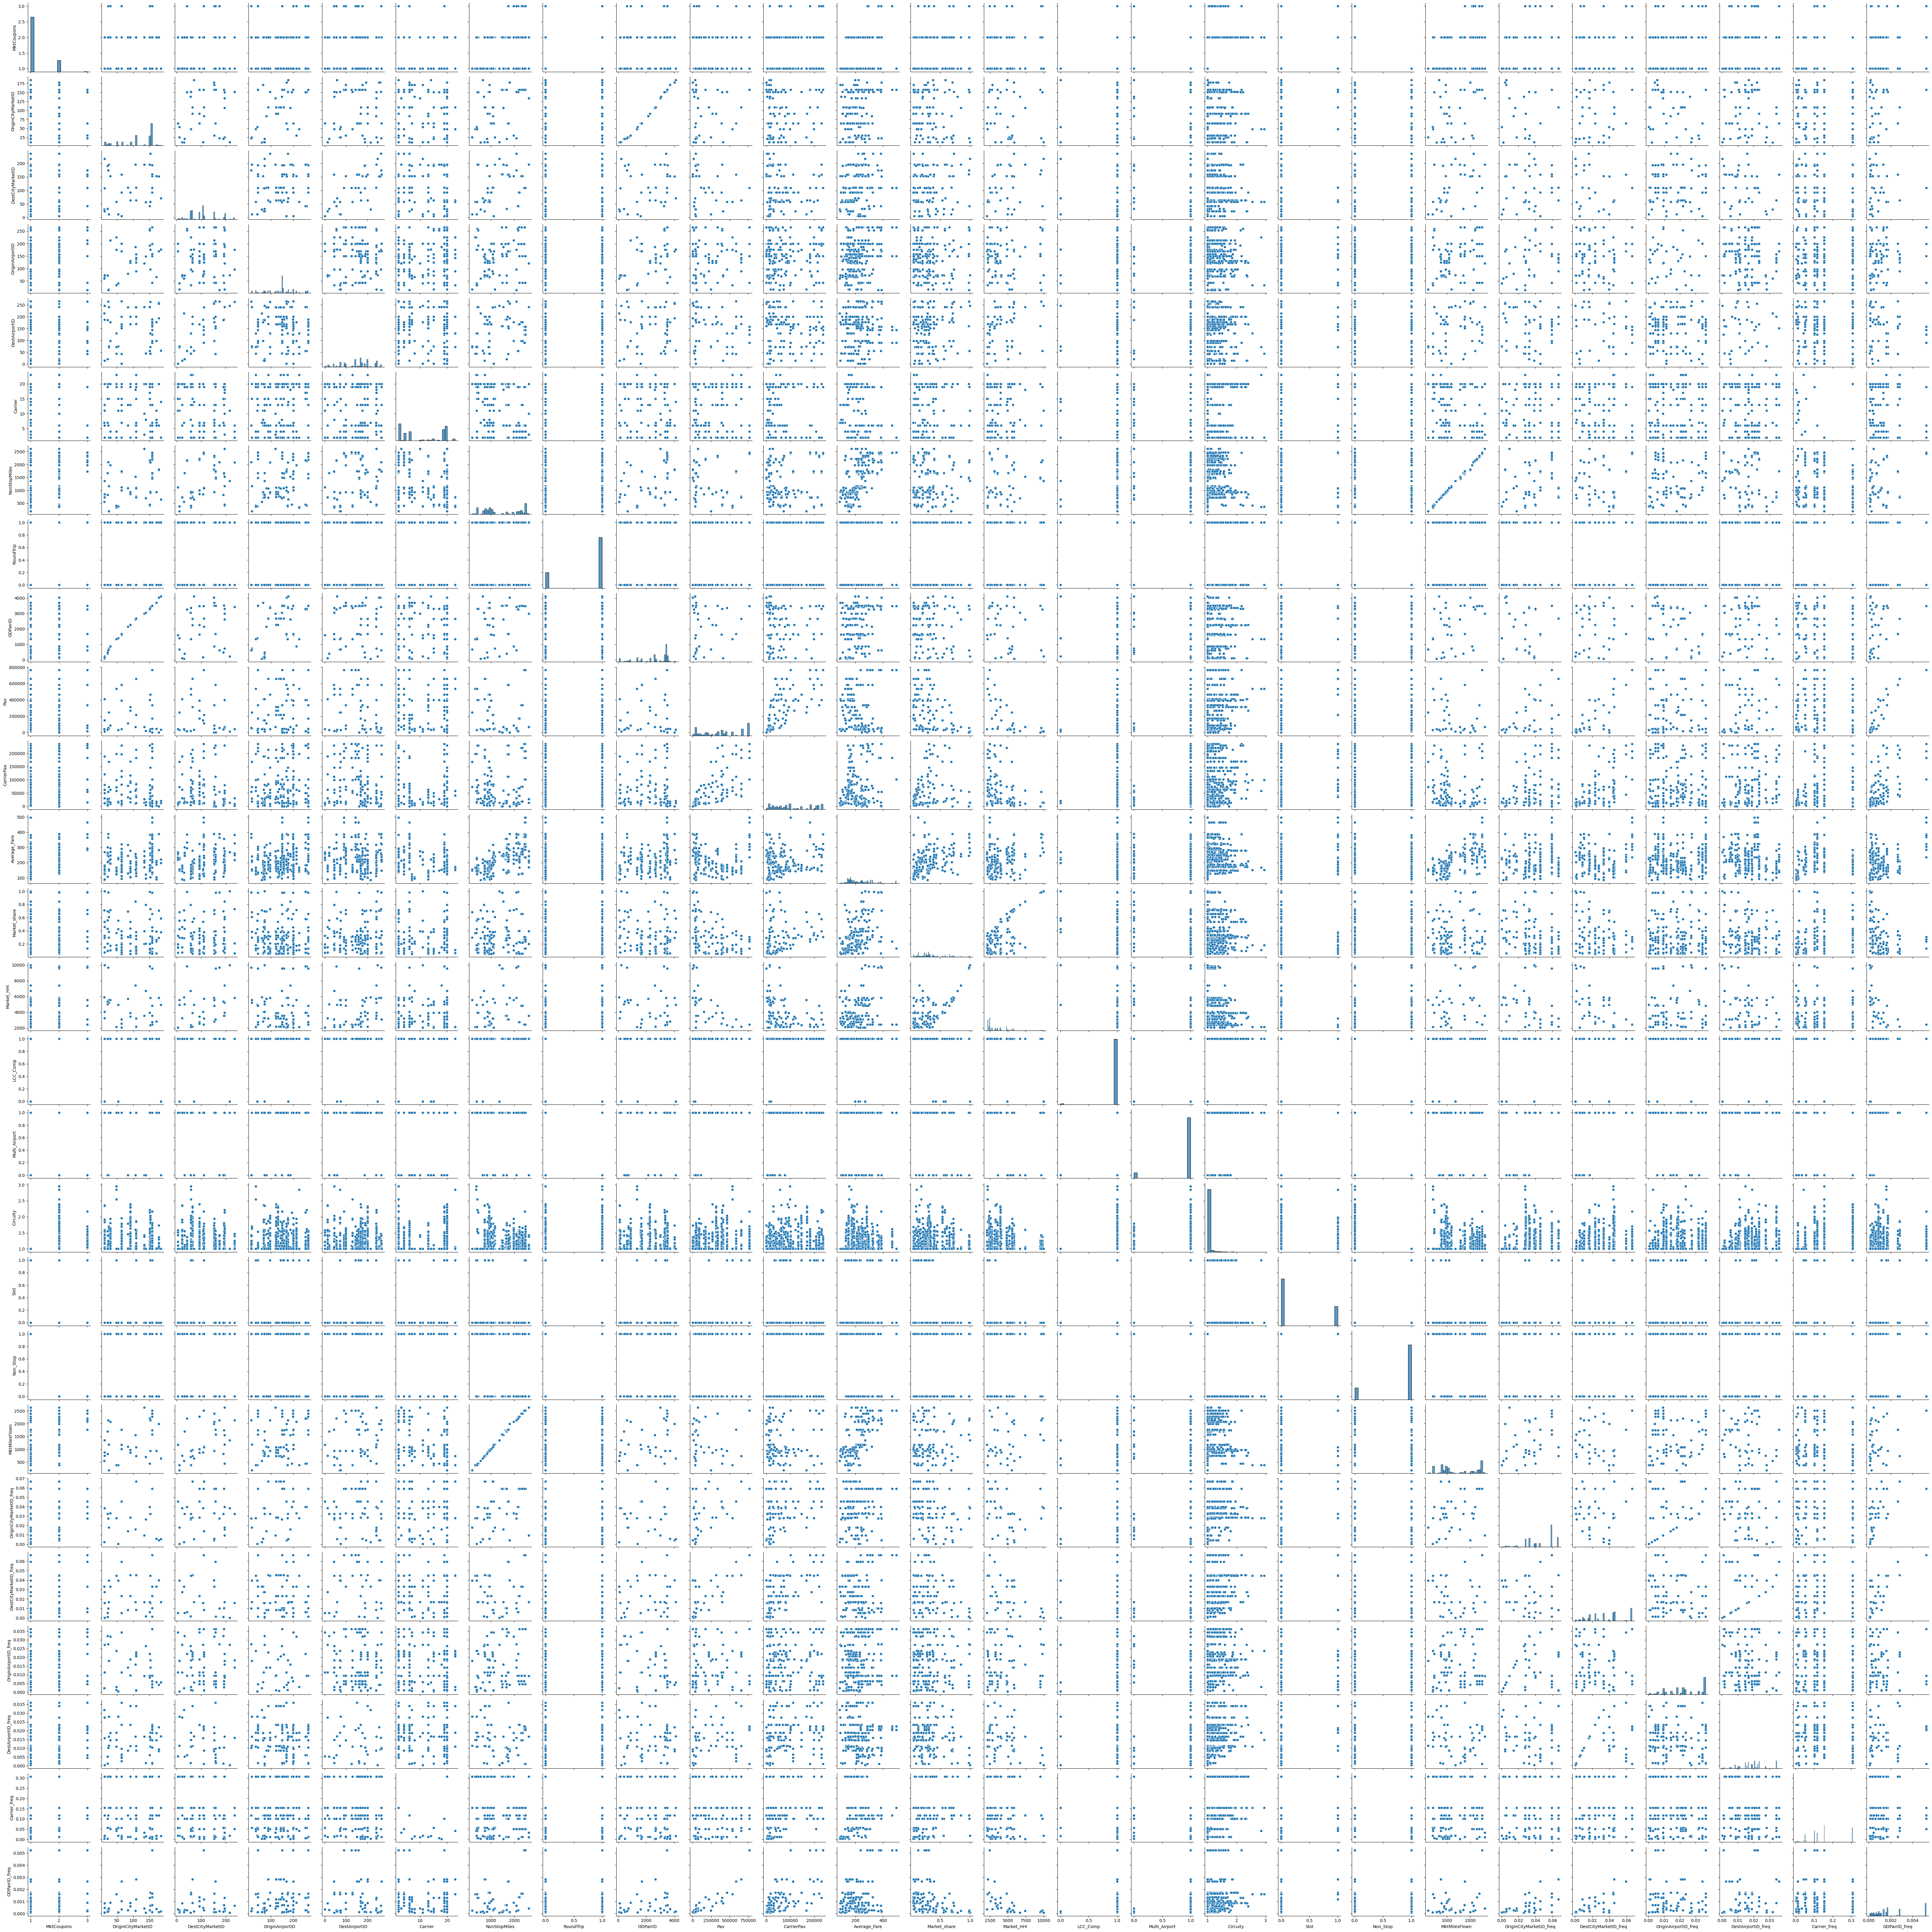

In [12]:
sns.pairplot(df)
plt.show()

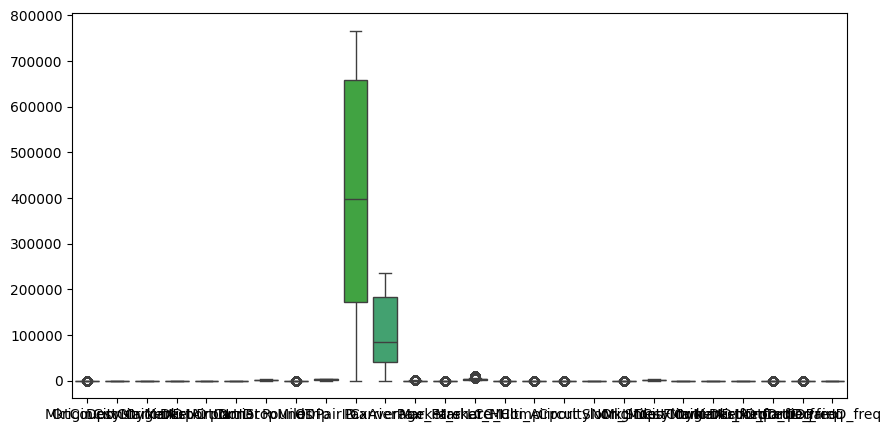

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.show()

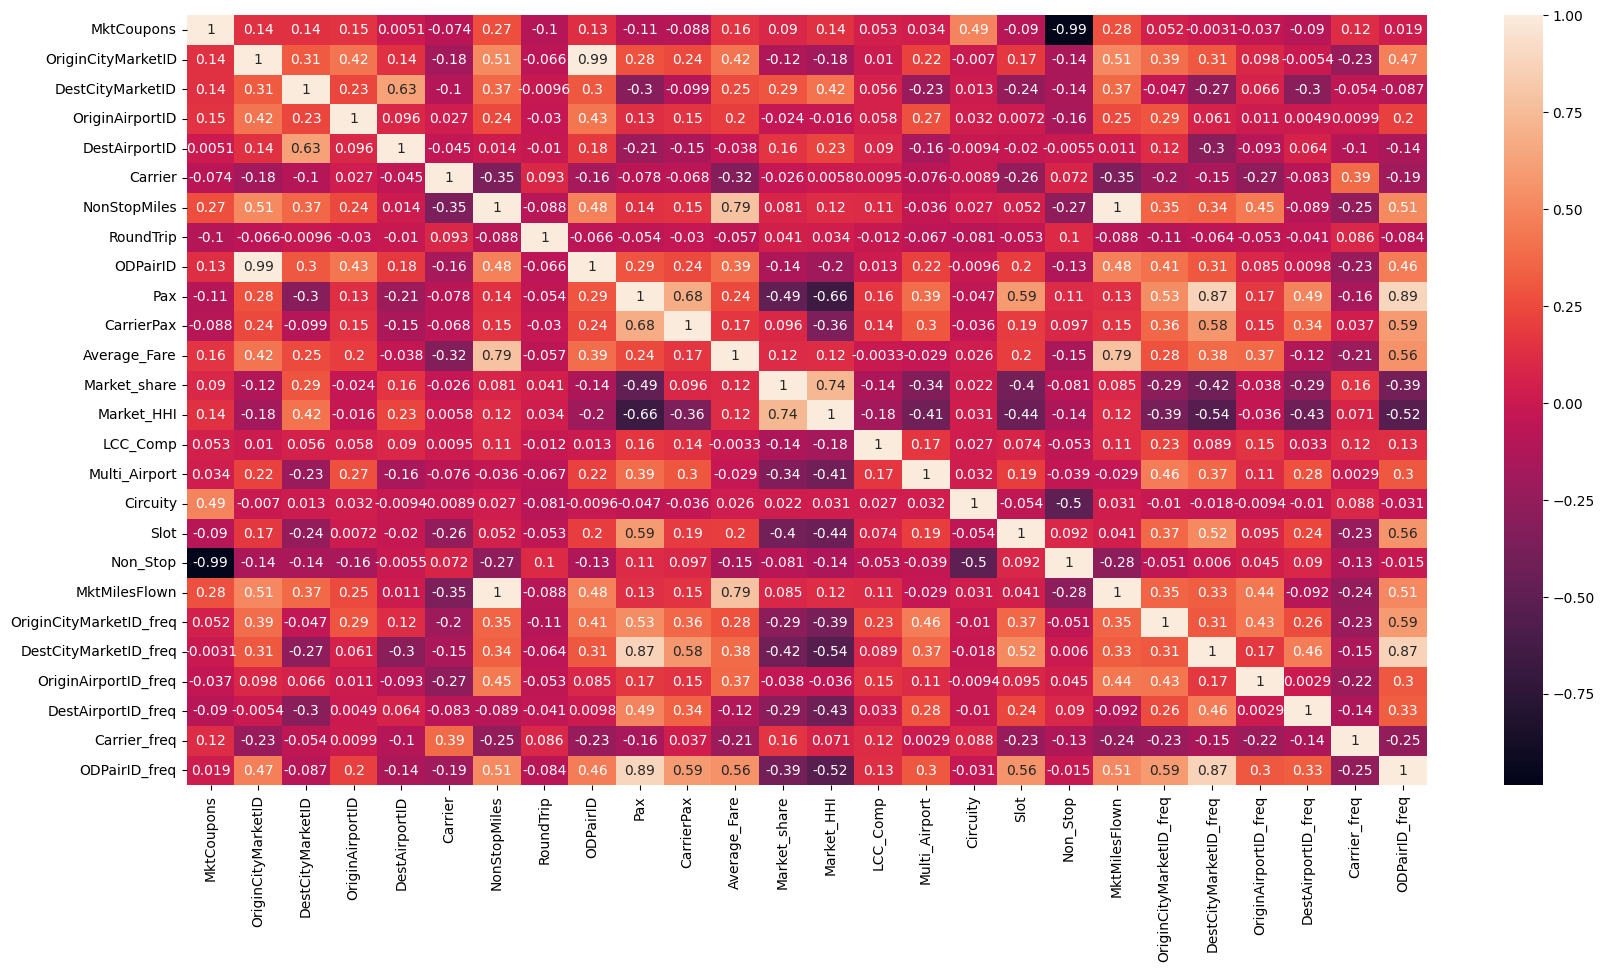

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
X=df.drop(['Average_Fare'],axis=1)
y=df['Average_Fare']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
lr_pred=lr.predict(X_test)

In [27]:
def evaluation(y_true,y_pred,model):
  mse=mean_squared_error(y_true,y_pred)
  rmse=np.sqrt(mse)
  r2=r2_score(y_true,y_pred)
  print(f"{model} Performance:")
  print(f"RMSE: {rmse:.2f}")
  print(f"R² Score: {r2:.2f}")

In [28]:
evaluation(y_test,lr_pred,'Linear Regression')

Linear Regression Performance:
RMSE: 42.45
R² Score: 0.75


In [29]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [30]:
dt_pred=dt.predict(X_test)

In [32]:
evaluation(y_test,dt_pred,'Decision Tree')

Decision Tree Performance:
RMSE: 0.50
R² Score: 1.00


In [33]:
rf=RandomForestRegressor()

In [34]:
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

In [35]:
evaluation(y_test,rf_pred,'Random Forest')

Random Forest Performance:
RMSE: 0.24
R² Score: 1.00


In [36]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

In [37]:
evaluation(y_test,xgb_pred,'XGBoost')

XGBoost Performance:
RMSE: 0.36
R² Score: 1.00
